# Gradient Boosting sample code

copy of gradient boosting [sample code](https://qiita.com/predora005/items/19aebcf3aa05946c7cf4)

## How to use XGBoost: multi class classification using iris data

XGBoost is a library using a type of decision tree algorythm, the GBDT(Gradient boosted decision tree).
This is a guide on the installation and use of said library. 
While multiple programming languages can be used, this guide will show the use with Python.

## What is GBDT
- a type of decision tree model
- a gradient boosted desicion tree

Another famous decision tree model is the random forest, which is summarized in the article below.
https://qiita.com/_tsuru/items/23fdc43ee0e54ec7c87e

## The hallmarks of GBDT
- easily achievable accuracy
- can use loss function values
- can handle numeric data

Since it has a easily achievable accuracy, it's popular in the machine learning competition Kaggle.

## [1] How to use

We will be using the iris data set from scikit-learn. The OS used is Amazon Linux2.

## [1-1] Installation

In Amazon Linux2 the installation is as follows. A guide on the installation can be found on the official website.
https://xgboost.readthedocs.io/en/latest/build.html

Comment:
type `pip3 install xgboost` into the responsible CLI.


## [1-2] Import

In [142]:
import xgboost as xgb

## [1-3] Retrieve the Iris data

There are no particularities to this process. You retrieve the Iris data and create a pandas DataFrame and a Series.


Comment:
iris data represents the input variables, meaning the features the flower has to be able to be classified. 
iris target represents the output variables, meaning what kind of flower it is, encoded as integer. 
Basically, data is the question, target is the answer

In [143]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

iris_data = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_target = pd.Series(iris.target)

## [1-4] Create training and testing data sets

There are no particularities here either, `train_test_split` from the scikit-learn package is used to split the data into training and testing data sets.

In [144]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(iris_data, iris_target, test_size = 0.2, shuffle = True)

## [1-5] Convert the data into an XGBoost data type

XGBoost uses `DMatrix` data types. 

`DMatrix` is made up of numpy `ndarray` and pandas `DataFrame` data types, which should not pose a problem.

Details on what type of data can be used can be found in the official documentation below.
https://xgboost.readthedocs.io/en/latest/python/python_intro.html#data-interface

In [145]:
dtrain = xgb.DMatrix(train_x, label = train_y)

## [1-6] Set Parameters

Set each specific parameter. 

In [146]:
param = {'max_depth' : 2, 'eta' : 1, 'objective': 'multi:softmax', 'num_class': 3}

The meaning of each parameter is as follows:
- max_depth = how many trees will be made at a maximum
- eta = learning rate, conrols the step size at each iteration. small nummber prevents overfitting, but requires more boosting rounds
- objective = specifies the learning task and the corresponding learning objective
- num_class = the number of classes

The learning objective described here is "multi:softmax." To learn more about this, check the official documentation.
https://xgboost.readthedocs.io/en/latest/parameter.html

## [1-7] Training

`num_round` represents the number of training rounds.

In [147]:
num_round = 10
bst = xgb.train(param,dtrain, num_round)

## [1-8] Prediction

In [148]:
dtest = xgb.DMatrix(test_x)
pred = bst.predict(dtest)

## [1-9] Confirming Accuaracy

Confirm the accuary with scikit's `accuacy_score`. 

In [149]:
from sklearn.metrics import accuracy_score

score = accuracy_score(test_y, pred)
print('score:{0:.4f}'.format(score))
# 0.9667


score:0.8667


## [1-10] Plot the importance

Visualize which features have contributed in what way to the predicted result.

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

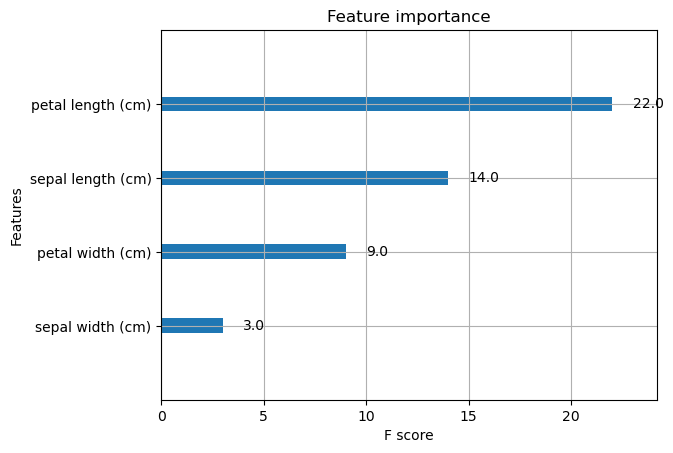

In [150]:
xgb.plot_importance(bst)

## [2] Validation and early stopping during training 

Validation and early stopping during the training proccess is easily accomplished by utilizing the validation data.

## [2-1] Splitting the data

A part of the training data is used for validation.

In [151]:
train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, test_size=0.2, shuffle=True)

## [2-2] Creating the DMatrix

In [152]:
dtrain = xgb.DMatrix(train_x, label=train_y)
dvalid = xgb.DMatrix(valid_x, label=valid_y)

## [2-3] Add parameters

When using validation, the "eval_metric" has to be added to the parameters. "eval_metric" defines how the result is evaluated.

In [153]:
param = {'max_depth': 2, 'eta': 0.5, 'objective': 'multi:softmax', 'num_class': 3, 'eval_metric': 'mlogloss'}

## [2-4] Training

The data to be observed is defined in "evallist." The label for the validation data is 'eval,'  for the training data 'train.'

xgb.train now has the addtional parameter `early_stopping_rounds`. If the evaluation has not changed after 5 rounds, the training proccess will be cancelled an the model output. 

In [154]:
evallist = [(dvalid, 'eval'), (dtrain, 'train')];
num_round = 10000;
bst = xgb.train(param, dtrain, num_round, evals = evallist, early_stopping_rounds=5);


# [0]   eval-mlogloss:0.61103   train-mlogloss:0.60698
# Multiple eval metrics have been passed: 'train-mlogloss' will be used for early stopping.
# 
# Will train until train-mlogloss hasn't improved in 5 rounds.
# [1]   eval-mlogloss:0.36291   train-mlogloss:0.35779
# [2]   eval-mlogloss:0.22432   train-mlogloss:0.23488
# 
# 〜〜〜 途中省略 〜〜〜
# 
# Stopping. Best iteration:
# [1153]    eval-mlogloss:0.00827   train-mlogloss:0.01863


[0]	eval-mlogloss:0.57069	train-mlogloss:0.56540
[1]	eval-mlogloss:0.34744	train-mlogloss:0.34413
[2]	eval-mlogloss:0.23224	train-mlogloss:0.22857
[3]	eval-mlogloss:0.15190	train-mlogloss:0.15983
[4]	eval-mlogloss:0.10399	train-mlogloss:0.12011
[5]	eval-mlogloss:0.08254	train-mlogloss:0.09191
[6]	eval-mlogloss:0.06753	train-mlogloss:0.07298
[7]	eval-mlogloss:0.05850	train-mlogloss:0.06010
[8]	eval-mlogloss:0.04903	train-mlogloss:0.05050
[9]	eval-mlogloss:0.04670	train-mlogloss:0.04300
[10]	eval-mlogloss:0.04453	train-mlogloss:0.03841
[11]	eval-mlogloss:0.04147	train-mlogloss:0.03455
[12]	eval-mlogloss:0.04314	train-mlogloss:0.03225
[13]	eval-mlogloss:0.04010	train-mlogloss:0.02959
[14]	eval-mlogloss:0.03760	train-mlogloss:0.02777
[15]	eval-mlogloss:0.04042	train-mlogloss:0.02637
[16]	eval-mlogloss:0.04160	train-mlogloss:0.02549
[17]	eval-mlogloss:0.04188	train-mlogloss:0.02429
[18]	eval-mlogloss:0.03954	train-mlogloss:0.02364
[19]	eval-mlogloss:0.03837	train-mlogloss:0.02282
[20]	eval-

## [2-5] Confirming the result of the validation

In [155]:
#print('Best Score:{0:.4f}, Iteration:{1:d}, Ntree_limit:{2:d}'.format(bst.best_score,bst.best_iteration,bst.best_ntree_limit))
#print('Best Score:{0:.4f}, Iteratin:{1:d}, Ntree_Limit:{2:d}'.format(
#     bst.best_score, bst.best_iteration, bst.best_ntree_limit))
# Best Score:0.0186, Iteratin:1153, Ntree_Limit:1154
bst.attributes()


{'best_iteration': '3393', 'best_score': '0.01573386417362599'}

## [2-6] Prediction

Performing predictions with the model that had the best results out of the validation results.

In [156]:
dtest = xgb.DMatrix(test_x)
pred = ypred = bst.predict(dtest)
#ntree_limit = bst.best_ntree_limit

In [157]:
print(ypred)

[2. 2. 2. 0. 2. 0. 1. 2. 1. 0. 2. 1. 1. 2. 0. 0. 2. 1. 2. 0. 1. 1. 1. 2.
 0. 1. 0. 0. 2. 2.]


In [158]:
print(dtest)

## Finally

For people with experience in machine learning, using the pandas DataFrame and Series might have seemed easy.

This example was about multiple class classification, but can just as well be used for binary classification and regression. This approach can be helpful in many different situations.

In [159]:
### End of J->E, switch E->J

# [3] Shap 

Shap is a python package that allows you to analyze and debug you models.
Shap values are used to explain individual model predictions, informing about how much a feature has influenced the prediciton.

while feature importance informs about how a feature affects the predictions in general, shap values give insight into how features influences **individual predicitons**. 

Esentially gives you an understanding of how machine learning models work. 


## SHAP 

SHAPは機械学習モデルの解析とデバッグを可能にするpythonパッケージです。
そのパッケージはモデルの予測のシャープレイ値を算出し、特徴量ごとが予測の影響が分かるようになります。


while feature importance informs about how a feature affects the predictions in general, shap values give insight into how features influences **individual predicitons**. 

Esentially gives you an understanding of how machine learning models work. 

## Shapley Values

Shapely values are a concept from cooperative game theroy to provide a way to fairly distribute the payoff of a cooperative game among players based on their contributions.
They are a method for assigning a fair share of the total payoff to each player in as cooperative game. They are based on the idea of marginal contributions: the additional value each player brings when joining a coalition.

The calculation of Shapley values involve considering all possible permutations of players joining the coalition and computing the marginal contribution of each player to each possible permutation. The Shapley value of a player is then the average of their marginal controbition over all possible permutations. 

In the context of machine learning, 

[source](https://www.youtube.com/watch?v=UJeu29wq7d0&list=PLqDyyww9y-1SJgMw92x90qPYpHgahDLIK&index=3)


In [160]:
## Shap

## Using Shap

Since shap is a package it needs to be imported alongside a few other packages that make working with it a bit more easier. 
This includes the matplotlib, pandas, numpy and seaborn package.
Since pandas is already in this scrip, it will not be imported.

## [3-1] Import and setup

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import shap

Shap also needs to be initilaized  in order to be able to be used.

In [162]:
shap.initjs()

## [3-2] Getting the SHAP values

The shap.TreeExplainer function desinged to explain prediction made by tree based models, such as the gradient tree bosting algorythm in this case.
It takes in a model a model as an argument and then provides the shapley values for each feature in each prediction made in the provided data set. 

The method takes in a model and returns an exlainer object specific to that model. The explainer can then take in some data, make predictions on that and returns the shap values of said predictions.

In [163]:
explainer = shap.TreeExplainer(bst)
shap_values = explainer(test_x)

For continuous or binary predictions, the explainer returns a list of arrays that contain a shapley value for each feature in each input data, in other words, a shapley value for each feature value. 
However in this case, since we have a multi class classification, the shapley values for each input are calculated for each class. 
The sum of the values show the probaility of the input being of that specific class and the model selects the one with the hightest probabiliy as the output of the model.

In [164]:
print(np.shape(shap_values))

(30, 4, 3)


## [3-3] Visualisation

Here we show the waterfalldiagramms for all three classes of for the second row of the data.

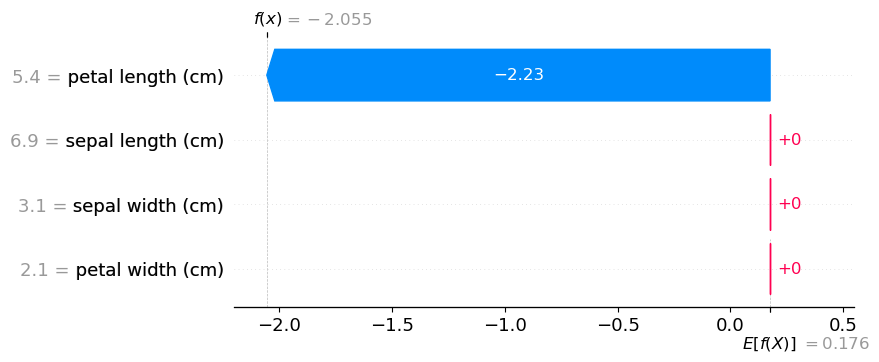

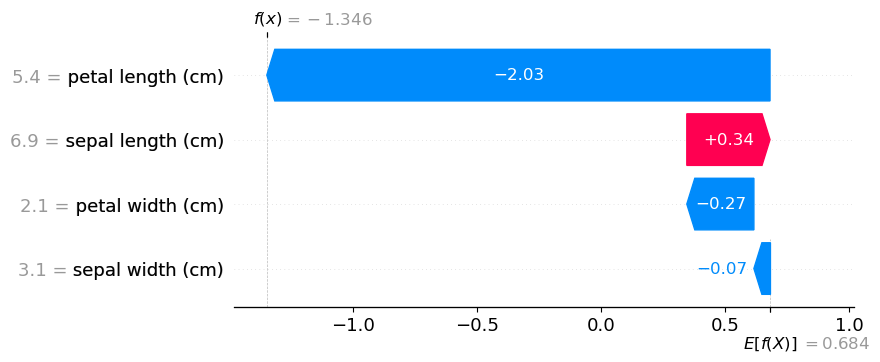

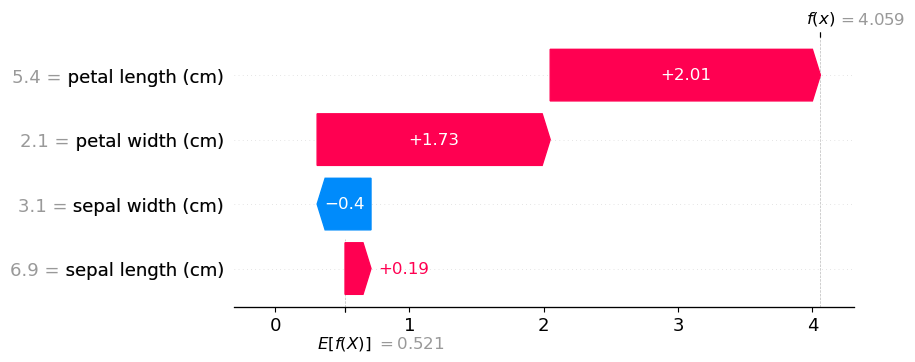

In [165]:
shap.plots.waterfall(shap_values[1,:,0])
shap.plots.waterfall(shap_values[1,:,1])
shap.plots.waterfall(shap_values[1,:,2])

In this case, this data was predicted to be of the 2nd type of class. From the charts below we can see that this matches both the predicted, and the manual classifications match. 

## [3-4] Shap Value Mean

In order to gain some more useful information about the provided shap values, the shap values can be aggreagated and put into differen contexts. In this example, we are calculating the absolute mean of the shap values. This give us insights similar to feature importance, just that here the importance of each datapoint for each class can be seen here.

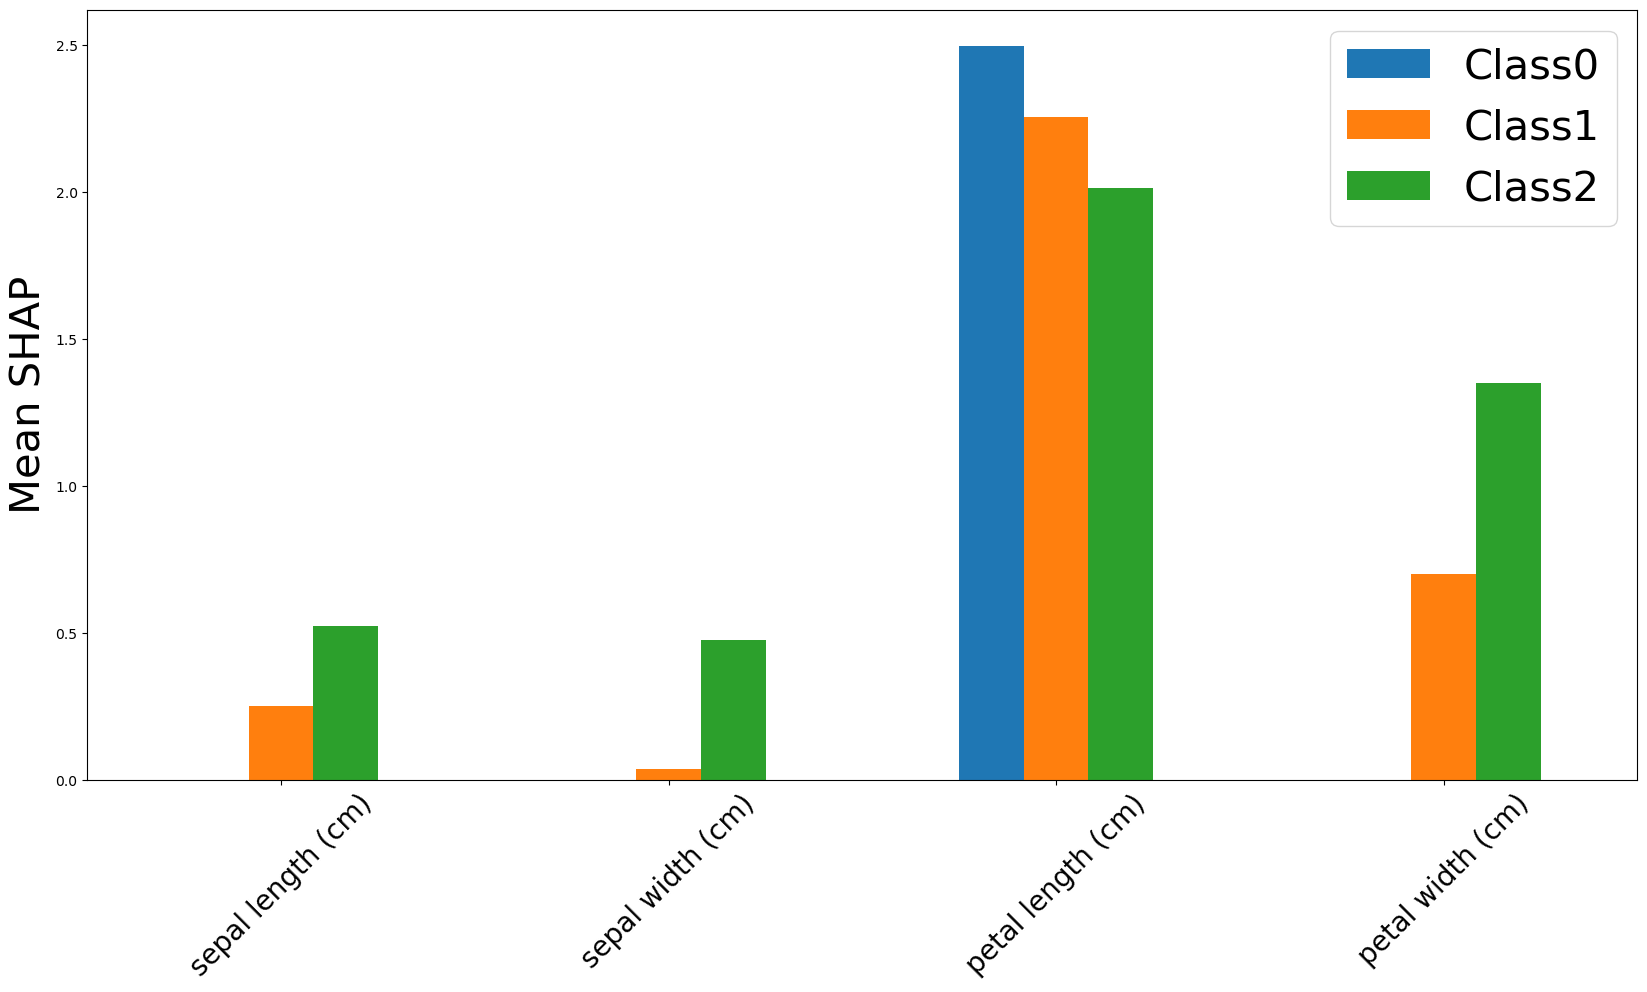

In [166]:
mean_0 = np.mean(np.abs(shap_values.values[:,:,0]),axis =0)
mean_1 = np.mean(np.abs(shap_values.values[:,:,1]),axis =0)
mean_2 = np.mean(np.abs(shap_values.values[:,:,2]),axis =0)

df= pd.DataFrame({"Class0": mean_0,"Class1": mean_1,"Class2": mean_2})

fig, ax  = plt.subplots(1,1, figsize =(20,10))
df.plot.bar(ax= ax)

ax.set_ylabel("Mean SHAP", size = 30)
ax.set_xticklabels(iris.feature_names, rotation = 45, size = 20)
ax.legend(fontsize = 30)

## [3-5] SHAP values for only the predicted class

In order to understand more clearly why certain predictions were made, it is often more useful to simply only plot the values of the predicted class.

Here we extract the shap values of the predicted class into a new list, by iterating over the predictions and using the integer preditcions (0,1,2) as indices to access the relevant columns.

In [167]:
Tnew_shap_values =[]
for i, pre in enumerate(pred) :
    #print(pre)
    #print(i)
    #print(shap_values.values[i][:,int(pre)])
    Tnew_shap_values.append(shap_values.values[i][:,int(pre)])

#new_shap_values = shap_values
#new_shap_value.values = np.array(Tnew_shap_values)
#shap_values.values = np.array(new_shap_values)

In order to maintain compatability with the different plot functions that expect the shap explainer result, we create a deep copy, meaning a true copy by value and not by reference, in order to preserve the general data structure.
We then replace the `.values` part of the array with the specific values of only the predicted classes as a numpy array.
This allows us to simply plug the shap values into the plotting functions without manipluating the indices, since the arrays now have the expected size.

In [168]:
import copy
new_shap_values= copy.deepcopy(shap_values)
new_shap_values.values = np.array(Tnew_shap_values)

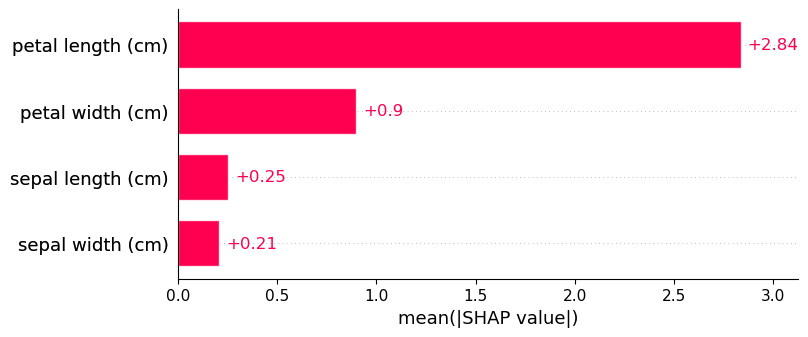

In [169]:
shap.plots.bar(new_shap_values)

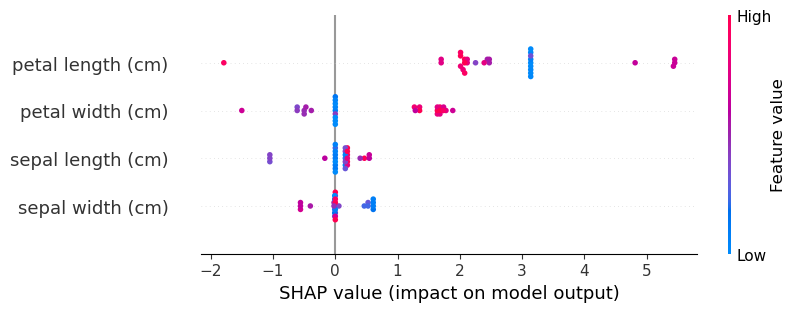

In [170]:
shap.plots.beeswarm(new_shap_values)

## [3-6] Saving the SHAP values

In order to persistiently save the results of our experiments, we want to serialize the results to csv. While there is a fairly straightorward method built into pandas for that, we must first prepare a new dataframe that contains both the shap values as well as original data relevant to it. 
First, we will only print the shap values of the predicted class.

Before creating our new dataframe, we first create bespoke column names for each of the shap values, and combine them with our data names column headers to create our new column headers. 

In [171]:
shap_feature_names = []
for f in iris.feature_names :
    shap_feature_names.append("SHARP for "+ f)

combined_column_names =iris.feature_names + shap_feature_names
print(combined_column_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'SHARP for sepal length (cm)', 'SHARP for sepal width (cm)', 'SHARP for petal length (cm)', 'SHARP for petal width (cm)']


We then create a new data frame that only contains the predicted values. Then we concatenate the dataframe with the original data. Since the concatenations only works as numpy array, the headers for both are lost. This is remedied by adding our previously prepared column names as the column names of a new dataframe containing all of our data.

In [172]:
#predicted_shap_df = pd.DataFrame(new_shap_values.values, columns=iris.feature_names)
predicted_shap_df = pd.DataFrame(new_shap_values.values, columns=shap_feature_names)
commbined_np_list = np.concatenate((test_x,predicted_shap_df ), axis=1)
combined_df = pd.DataFrame(commbined_np_list, columns=combined_column_names)


Finally, we serialize the data to a new .csv file.

In [173]:
combined_df.to_csv('predicted_shap_values_combined.csv', index=False)

We might want more information on the predictions we've made, we might want all of the shap values. 
For this we will have to perfor the same steps as before, only to expand it for all 3 classes.
First we prepare an array that contains all of the SHAP values. 
We first extract the predicitons for each class into their own data set, and then concatenate the arrays into one large one.
This gives us the data shape we would like to have for serialisation.

In [174]:
full_result_data = []
for i in range(len(shap_values)) :
    data_1 = shap_values.values[i][:,0]
    data_2 = shap_values.values[i][:,1]
    data_3 = shap_values.values[i][:,2]
    args = (data_1, data_2, data_3)
    return_data = np.concatenate(args)
    full_result_data.append(return_data)


Next, just like above, we create a new list of headers, just with idenfifiers for each class.

In [175]:
full_shap_feature_names = []
for i in range(3):
    for f in iris.feature_names :
        full_shap_feature_names.append("SHARP for "+ f + " Class" + str(i+1))

full_column_names =iris.feature_names + full_shap_feature_names
print(full_column_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'SHARP for sepal length (cm) Class1', 'SHARP for sepal width (cm) Class1', 'SHARP for petal length (cm) Class1', 'SHARP for petal width (cm) Class1', 'SHARP for sepal length (cm) Class2', 'SHARP for sepal width (cm) Class2', 'SHARP for petal length (cm) Class2', 'SHARP for petal width (cm) Class2', 'SHARP for sepal length (cm) Class3', 'SHARP for sepal width (cm) Class3', 'SHARP for petal length (cm) Class3', 'SHARP for petal width (cm) Class3']


We then combine the data we've aggregated before with the original data again and create the dataframe with the headers again. 

In [176]:
full_np_list = np.concatenate((test_x,full_result_data ), axis=1)
full_df = pd.DataFrame(full_np_list, columns=full_column_names)


Finlly we serialize the values to csv again.

In [177]:
full_df.to_csv('full_shap_values.csv', index=False)

# [4] Cross Validation

Cross validation describes a process artificially expanding the training set by rotating training and testing sets. 
When working with a limited amount of data, often times it can be very important to include all of the sampled data in the training set. However, doing this would not allow you to leave any data for testing and if testing was performed on trained data sets, it would taint the testing set. But small data sets also have the disadvantage of having outliers influence the result significantly. This is where cross valiadation comes into play. 

Here the sets are split into even blocks, usually 5 or 10, and one of those sets is designated the testing set. 
Then a model is trained using using the training data, and tested using the testing data, as well as assiged an accuaracy.
Following this, another model is trained by using a different data block as the testing data. The process is repeated until all of the blocks have served as the testing data once. Then the performance of the models will be averaged and provide an output as the average performance. 
Since the data can be split into k number of parts, it is also called k-fold cross valiadation. 

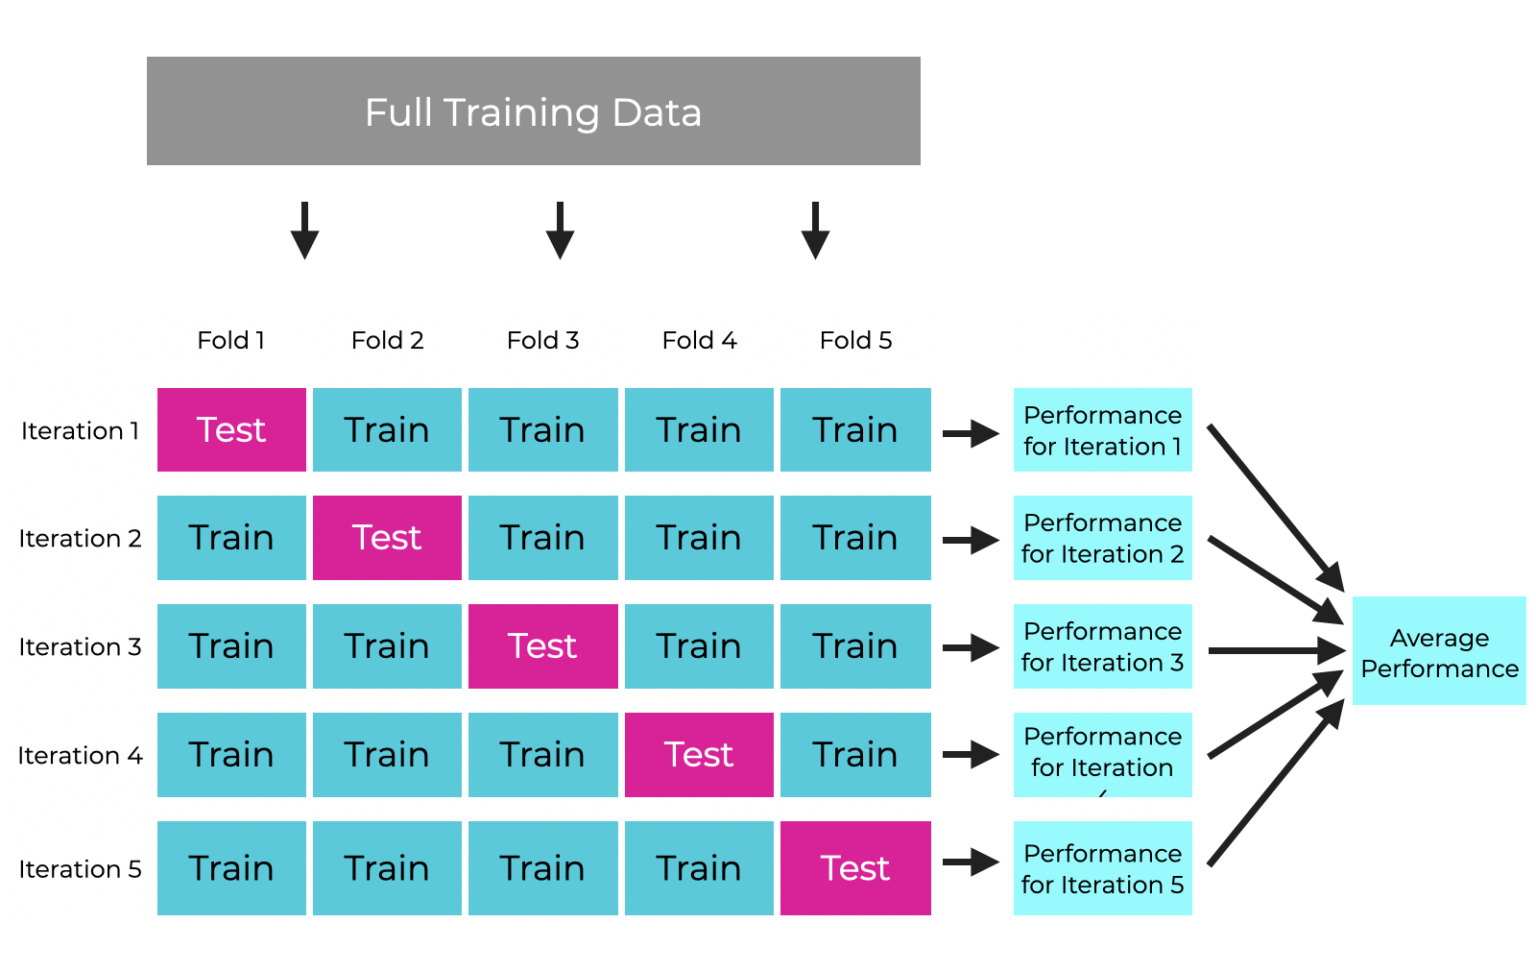





## [4-1] Getting the indicies

Unfortunately, there is no function that completetely takes over the entire process of the performing the cross valiadation in one function. However there is a function that splits up the indices of an input data into several folds that can be used in the cross validation. Hovever these are only indicies, so we have to save the actual values into lists. 
In actuality, working with the indicies is the most effective and efficent method of handling the data, but since this is an academic exercise to show how the process works, we will save the actual values into seperate lists to make it more understandable for the novice programmer.

First we import the required `Kfold` method from SKlearn. 
We then prepare lists of indicies for our test data and target values, as well as our validation data and target values, followed by initializing a folder object with the number of folds we want to perform. 

We then start to iterate over the number of folds provided by the `.split` function, which gives us indices for each fold. 
It is important to note that the `train` and `valid` variables don't just contain single values but actually arrays of indicies. `train` contains the indicies of all 4 parts used for training in that specific fold, while `valid` contains the 1 part used for validation. 

In [178]:
from sklearn.model_selection import KFold

fold_test_list_x = []
fold_test_list_y = []
fold_valid_list_x = []
fold_valid_list_y = []
kf = KFold(n_splits = 5)

for train, valid in kf.split(iris_data):
    
    x_tr = iris_data.loc[train]
    x_val = iris_data.loc[valid]

    y_tr = iris_target.loc[train]
    y_val = iris_target.loc[valid]
    
    fold_test_list_x.append(x_tr)
    fold_test_list_y.append(y_tr)
    
    fold_valid_list_x.append(x_val)
    fold_valid_list_y.append(y_val)


## [4-2] Training the model

Since we are going to train several models, we define a simple function that perfoms the training for us. 
This means that we need to make fewer changes to the code when we want to change parameters.
The nature of Notebooks any python as a scriping language means that it does not matter where the function is defined, as long as the function is run at least once, it can be used anywhere in the notebook.

For here particularly, we read in data and target values, transform them into DMatrices interpretable by the XGBoost alrogtythm and define some parameters. 
We then perform the training and return the trained model.

For our actual execution we want simply tain models for all out entries in the list of training data and save the model in a list of models.

In [179]:
def train_model_custom(train_x, train_y) :
    dtrain = xgb.DMatrix(train_x, label=train_y)
    param = {'max_depth' : 2, 'eta' : 1, 'objective': 'multi:softmax', 'num_class': 3}
    num_round = 10
    bst = xgb.train(param,dtrain, num_round)
    return bst


In [180]:
models = []

for i in range(5):
    model_to_add = train_model_custom(fold_test_list_x[i], fold_test_list_y[i]) 
    models.append(model_to_add)


## [4-3] Calculating the accuracy

In order to evaluate our models, we want to calculate the accuracy. 
For this we simply make predictions for each of our models and compare them to the target. 
We then use the `accuracy_score` method built into Sklearn to get the accuarcy of our model. 
We repeat this for each model we have trained.

In [181]:

accuracy = []
for i in range(5):
    dvalid = xgb.DMatrix(fold_valid_list_x[i], label=fold_valid_list_y[i])
    pred = models[i].predict(dvalid)
    acc_score = accuracy_score(fold_valid_list_y[i], pred)
    accuracy.append(acc_score)
    print(acc_score)
    

1.0
1.0
0.9
0.9
0.7333333333333333


Since this only tells us about the individual models and predictions should be based on the output of all our models, we will simply calculate the average of our accuracy and assign this to our total accuarcy.
(Loop for illustration purposes, in actual cases use `np.mean`)

In [182]:
total_accuracy = 0.0
for i in range(0,5):
    total_accuracy = total_accuracy + accuracy[i]

total_accuracy = total_accuracy/5
print(total_accuracy)

0.9066666666666666


## [4-4] Using StratifiedKFold

When observing our data we have noticed that out data is actually sorted by class. This causes a little problem when training, since it introduces certain biases into our models.
In order to fix this, it is recommended to always shuffle your dataset before training. However, this again might cause biases by chance. 
This is where StratifiedKFold comes into play. It makes sure the the ratio between samples is approximately the same across all folds. That means if one part has 3 samples of class X, all other folds will also strive to have 3 samples of class X etc.

We perform the same operation with some slight modifications, mainly specifying `shuffle = True` for randomisation as well as introducing a random seed to make our experiment reproducable. 

In [183]:
from sklearn.model_selection import StratifiedKFold

fold_test_list_x = []
fold_test_list_y = []
fold_valid_list_x = []
fold_valid_list_y = []


kf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 553)

for train, valid in kf.split(iris_data, iris_target):
    x_tr = iris_data.loc[train]
    x_val = iris_data.loc[valid]

    y_tr = iris_target.loc[train]
    y_val = iris_target.loc[valid]
    
    fold_test_list_x.append(x_tr)
    fold_test_list_y.append(y_tr)
    
    fold_valid_list_x.append(x_val)
    fold_valid_list_y.append(y_val)

In [184]:
for i in range(10):
    model_to_add = train_model_custom(fold_test_list_x[i], fold_test_list_y[i]) 
    models.append(model_to_add)

In [185]:
accuracy = []
for i in range(10):
    dvalid = xgb.DMatrix(fold_valid_list_x[i], label=fold_valid_list_y[i])
    pred = models[i].predict(dvalid)
    acc_score = accuracy_score(fold_valid_list_y[i], pred)
    accuracy.append(acc_score)
    print(acc_score)

1.0
1.0
0.8666666666666667
0.9333333333333333
1.0
1.0
1.0
1.0
1.0
1.0


In [186]:
total_accuracy = 0.0
for i in range(0,10):
    total_accuracy = total_accuracy + accuracy[i]

total_accuracy = total_accuracy/10
print(total_accuracy)

0.9800000000000001


As can be seen here, increasing the number of models as well as shuffling the dataset has led to an increase in accuracy.

## [4-5] Conclusion

In conclusion cross validation helps to improve model accuracy, especially when dealing with smaller data sets. 
It is reccomended to use this method whenever the computing power allows for it.

## [5] Selfmade seperating function

Selfmade seperating logic for academic purposes. 
Splits the data set into two sets, if he petal lenght is longer than 5cm it's moved to validation, if not it goes into the training set.

First we get the number of "petal lenght" data entries and save it as `x`. This will serve as our iterator later. 
We then set up data frames and series for our data and targets respecively.

In [187]:

x = iris_data["petal length (cm)"[:]].shape[0]
valid_data = pd.DataFrame([], columns = iris.feature_names)
training_data = pd.DataFrame([], columns = iris.feature_names)

valid_target = pd.Series([])
training_target = pd.Series([])

Here we start to iterate over the number of entries, accessing the "petal length" data and checking for our condition, depending on which,  we extract the data from the original set at the current index, as well as the target to the respective lists.

In [188]:
for i in range(x) : 
    if iris_data["petal length (cm)"][i] >= 5.0 :
        valid_data.loc[i] = iris_data.loc[i]
        valid_target.loc[i] =iris_target.loc[i]
    else :
        training_data.loc[i] = iris_data.loc[i]
        training_target.loc[i] =iris_target.loc[i]

Since python does not handle for loops very efficiently, this process could take a long time to finish.
A more efficient way of getting the desired data would be to filter using the syntax below. 
Since filtering only contains references the indicies can be used to filter the target values again. 

In [189]:
#alternate way of filtering the data frame
filtered_data = iris_data.loc[iris_data['petal length (cm)']> 5]
filtered_indices = iris_target.loc[filtered_data.index]

In [190]:
valid_data.to_csv('valid_data.csv', index=False)
training_data.to_csv('train_data.csv', index=False)

In [191]:
print(iris_data.shape)

(150, 4)


In [192]:
print(training_data.shape)

(104, 4)


In [193]:
print(valid_data.shape)

(46, 4)


## Adding ID fields to Iris Data


In order to identify the data, two ID fields and a date field need to be added to the dataset. This is accomplished by creating a new copy of the additional dataframe, adding the ID columns and initializing them with zeros.
We then iterate over the data and add a unique identifier to each of the ID columns.


In [194]:
new_iris_data = copy.deepcopy(iris_data)

new_iris_data['ID1'] = 0
new_iris_data['ID2'] = 0
##TODO: Add in date fields
for i in range(new_iris_data["petal length (cm)"].shape[0]) :
    new_iris_data.loc[i, "ID1"] = int(i)
    new_iris_data.loc[i, "ID2"] = int(i)

print(new_iris_data)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     ID1  ID2  
0      0   

For the target, we first transform the series into a dataframe and perform the same action as we did with the target.

In [195]:
new_iris_target = pd.DataFrame(iris_target, columns = ["class"])
new_iris_target['ID1'] = 0
new_iris_target['ID2'] = 0
for i in range(new_iris_target["class"].shape[0]) :

    new_iris_target.loc[i, "ID1"] = i
    new_iris_target.loc[i, "ID2"] = i

print(new_iris_target)

     class  ID1  ID2
0        0    0    0
1        0    1    1
2        0    2    2
3        0    3    3
4        0    4    4
..     ...  ...  ...
145      2  145  145
146      2  146  146
147      2  147  147
148      2  148  148
149      2  149  149

[150 rows x 3 columns]


Then, similar to to [4-1], we create fold out of our data again. The difference is this time, that we have a true random shuffle in our folds.

In [196]:
fold_train_list_x_new = []
fold_train_list_y_new = []
fold_valid_list_x_new = []
fold_valid_list_y_new = []
kf_new = KFold(n_splits = 5, shuffle = True)

for train, valid in kf_new.split(new_iris_data):
    
    x_tr = new_iris_data.loc[train]
    x_val = new_iris_data.loc[valid]

    y_tr = new_iris_target.loc[train]
    y_val = new_iris_target.loc[valid]
    
    fold_train_list_x_new.append(x_tr)
    fold_train_list_y_new.append(y_tr)
    
    fold_valid_list_x_new.append(x_val)
    fold_valid_list_y_new.append(y_val)

We then expand our column names that we used in [3-6] with columns for the ID at the appropriate positions. 

In [197]:
full_column_names = iris.feature_names + ["ID1","ID2"] + full_shap_feature_names

similar to [4-2] we once again make use of our training function. 
However in this case, we need to specifically filter out all of the data we want from the passed dataframes.
to improve readability, the current fold without the ID is saved as current_fold_data_without_ID, the current target without the ID is saved as current_fold_target_without_ID  and the dataset for validation is saved as
current_fold_validation_without_ID.

After the training step, similar to [3-6] we once again output all of the shap values, use the column names to combine the data in a dataframe we can output. Since we have multiple models and validation sets, we putput shap values for each class and data set, followed by saving a file for each model that we have.


In [212]:
new_models = []

for i in range(5):
    print(f"Training model {i}" )
    print(fold_train_list_x_new[i].head())
    current_fold_data_without_ID = fold_train_list_x_new[i][["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)"]]
    current_fold_target_without_ID = fold_train_list_y_new[i]["class"]
    current_fold_validation_without_ID = fold_valid_list_x_new[i][["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)"]]
    model_to_add = train_model_custom(current_fold_data_without_ID,current_fold_target_without_ID) 
    new_models.append(model_to_add)    
    ##TODO: add shap values and output total as .csv
    explainer = shap.TreeExplainer(model_to_add)
    shap_values = explainer(current_fold_validation_without_ID)
    full_result_data = []
    for j in range(len(shap_values)) :
        data_1 = shap_values.values[j][:,0]
        data_2 = shap_values.values[j][:,1]
        data_3 = shap_values.values[j][:,2]
        args = (data_1, data_2, data_3)
        return_data = np.concatenate(args)
        full_result_data.append(return_data)
    full_np_list = np.concatenate((fold_valid_list_x_new[i],full_result_data ), axis=1)
    full_df = pd.DataFrame(full_np_list, columns=full_column_names)
    full_df.to_csv(f'full_shap_values_model_{i}.csv', index=False)


Training model 0
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   ID1  ID2  
0    0    0  
1    1    1  
2    2    2  
3    3    3  
4    4    4  
Training model 1
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4           

Finally, we once again calculate the accuracy, similar as to we did in [4-3], with the added complexity of removing the ID from the data again, in the same style as the previous code block. We both put out the accuracy of each model as well as add it to a list and calculate the average accuracy.

In [207]:
new_accuracy = []
for i in range(5):
    current_fold_valid_list_x_without_ID= fold_valid_list_x_new[i][["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)"]]
    current_fold_valid_list_y_without_ID= fold_valid_list_y_new[i]["class"]
    dvalid = xgb.DMatrix(current_fold_valid_list_x_without_ID, current_fold_valid_list_y_without_ID)
    pred = models[i].predict(dvalid)
    acc_score = accuracy_score(current_fold_valid_list_y_without_ID, pred)
    new_accuracy.append(acc_score)
    print(acc_score)

1.0
1.0
0.9666666666666667
1.0
1.0


In [208]:
np.mean(new_accuracy)

0.9933333333333334